# Progarm to predict the survival of passengers in the titanic


# problem statement

Here we will use the given dataset named "Titanic_train.csv" to calculate conditional probabilities and expectations and predict the survival of passengers in the titanic ship

In [111]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [112]:
#loading the dataframe
df=pd.read_csv("titanic_train.csv")
df.head(10) #display first 10 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [113]:
#counting number of rows and columns in the dataset
df.shape

(891, 12)

# Getting some statsitics

In [114]:
#DataTypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [115]:
#column names(attributes)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


   KEY OBSERVATION FROM df.describe() 
   
    
     

1)there are some missing datas((NaN) in age column

2)There is a huge difference between 75% and max in "SibSp","Parch","Fare"

From above obervation we can tell there may be some outliers from the given data

# Exploring data variables

In [118]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [119]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

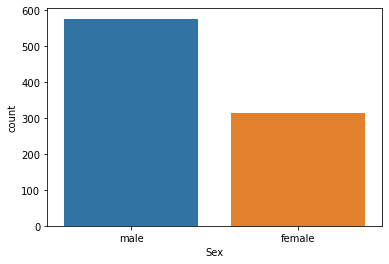

In [120]:
#counting number of males and females
sns.countplot(x="Sex",data=df)

we find that there are more males than females in the ship

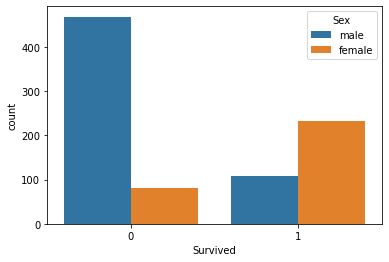

In [121]:
#getting number of survived and not survived based on sex
sns.countplot(x="Survived",data=df,hue="Sex")

from the above plot we found that more males died than the female and female had high chance of surviving porbabiility

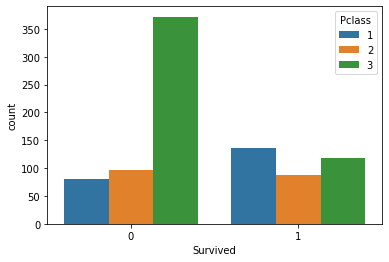

In [122]:
#getting number of survived and not survived based on Pclass
sns.countplot(x="Survived",data=df,hue="Pclass")

from the above plot we say that 


1)there were less number of survivors from the Pclass-3 when compared to pclass-1,2


2)equal number of survivors(approx) from all the pclass

In [123]:
#from our own observation we say that the sex may have a high corelation with survived
#we find that the attribute sex is of datatype object
#so we convert the datatype in sex attribute to integer 

In [124]:
#convert sex attribute of dtype object to integer
df["Sex"]=df['Sex'].map({'male': 0, 'female': 1}).astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [125]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Finding and Removing NaN values

In [126]:
#finding nan values
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [127]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we found that there are some missing datas in age,cabin,embarked attributes

In [128]:
#Removing NaN values
df['Age'].mean()


29.69911764705882

In [129]:
df["Age"].fillna(df['Age'].mean(),inplace=True)

In [130]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [131]:
df.shape

(891, 12)

we can see the cabin has 687 missing values.from the info we can say that cabin is not related to our target in anyway. Droping of nan values from cabin column will relsult in losing of more data.

so we drop the cabin column to save more more data for testing and training

In [132]:
df.drop(["Cabin"], axis=1,inplace=True)

In [133]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C


In [134]:
df.shape

(891, 11)

In [135]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

now we can see nan values in Embarked and the sum is low.so we drom the nan values

In [136]:
df.dropna(inplace=True)

In [137]:
df.shape

(889, 11)

In [138]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA
Univariate analysis

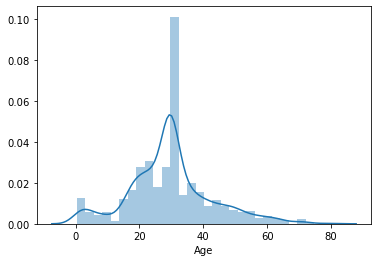

In [139]:
#Age ditribution
sns.distplot(df["Age"])

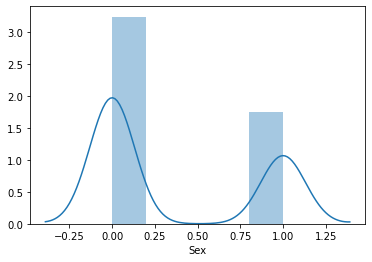

In [140]:
#Sex ditribution
sns.distplot(df["Sex"])

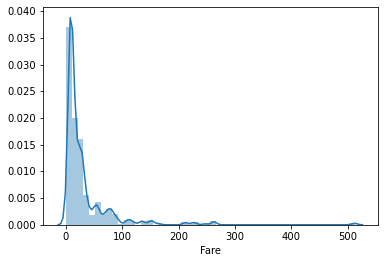

In [141]:
#Fare distribution
sns.distplot(df["Fare"])

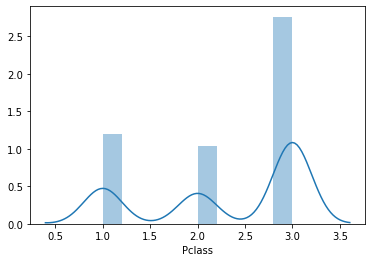

In [142]:
#Pclass distribution
sns.distplot(df["Pclass"])

OBSERVATION:


1) Age distribution shows Normal displacement

2) sex distribution shows that males are higher than females in the ship

3) from fare distribution we can say it has skewedness values

# Bivariate analysis

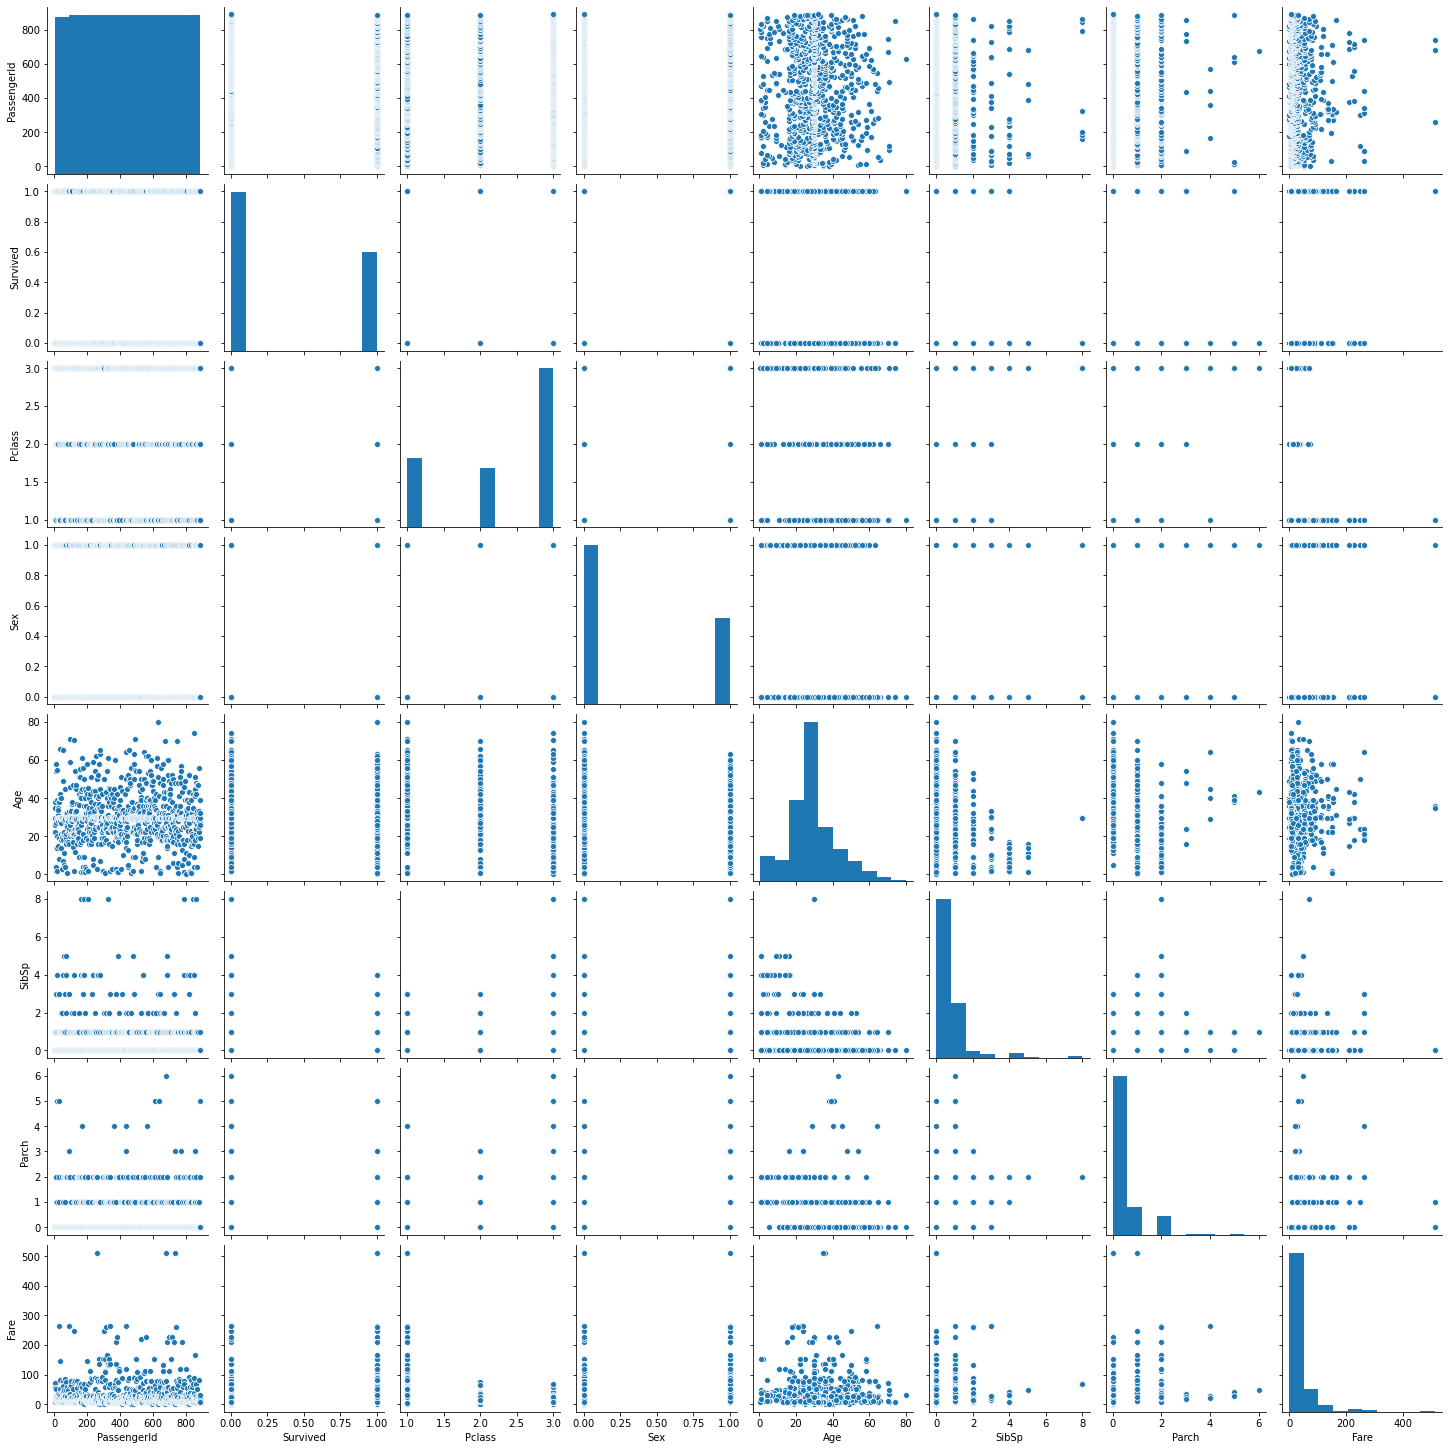

In [143]:
sns.pairplot(df)


# Multivarient

In [144]:
#Checking correlation
dfcor=df.corr()
dfcor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.327954,0.081656,0.016824,-0.548193
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.089434,0.116348,0.247508,0.179958
Age,0.030300,-0.074673,-0.327954,-0.089434,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,0.247508,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.179958,0.088604,0.160887,0.217532,1.000000


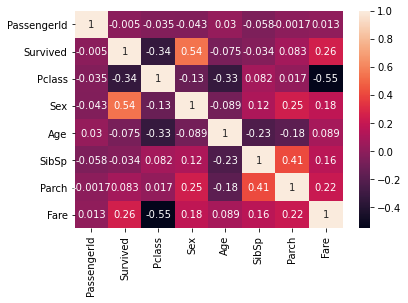

In [145]:
sns.heatmap(dfcor,annot=True)

observation from the correlation value to the target

1) pclass is negatively corelated with the survival 

2) age is highly negatively corelated with survived but has been related someway to survived 

3) Sex is highly positively corelated with survived

# Dropping attributes which are not correlated to our target(survived)

In [146]:
df.drop(["Name","Ticket","Embarked","Pclass"], axis=1 ,inplace=True)
df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
0,1,0,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,0,35.0,0,0,8.0500


# Ploting outliers

PassengerId       AxesSubplot(0.125,0.125;0.0945122x0.755)
Survived       AxesSubplot(0.238415,0.125;0.0945122x0.755)
Sex            AxesSubplot(0.351829,0.125;0.0945122x0.755)
Age            AxesSubplot(0.465244,0.125;0.0945122x0.755)
SibSp          AxesSubplot(0.578659,0.125;0.0945122x0.755)
Parch          AxesSubplot(0.692073,0.125;0.0945122x0.755)
Fare           AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

<Figure size 720x720 with 0 Axes>

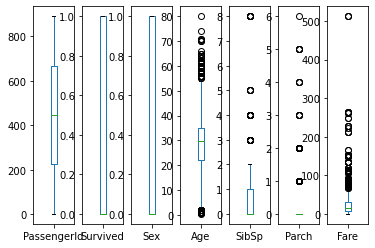

In [147]:
plt.figure(figsize=(10,10))
df.plot(kind="box",subplots=True)

observation : there are very high outliers in fare variable and age variable

# Removing outliers

In [148]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73250451, 0.78696114, 0.73534203, ..., 0.43135024, 0.47432585,
        0.50023975],
       [1.72861124, 1.27071078, 1.35991138, ..., 0.43135024, 0.47432585,
        0.78894661],
       [1.72471797, 1.27071078, 1.35991138, ..., 0.47519908, 0.47432585,
        0.48664993],
       ...,
       [1.72471797, 0.78696114, 1.35991138, ..., 0.43135024, 2.00611934,
        0.17408416],
       [1.72861124, 1.27071078, 0.73534203, ..., 0.47519908, 0.47432585,
        0.0422126 ],
       [1.73250451, 0.78696114, 0.73534203, ..., 0.47519908, 0.47432585,
        0.49017322]])

In [149]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
0,1,0,0,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,1,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,0,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,1,29.699118,1,2,23.4500
889,890,1,0,26.000000,0,0,30.0000


In [150]:
print(df.shape)
print(df_new.shape)

(889, 7)
(818, 7)


# preparing dataset for model training

seperating independent and dependent variable

In [151]:
x=df_new.drop("Survived",axis=1)
y=df_new["Survived"]

splitting the testing and training data

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [153]:
x_train.shape

(638, 6)

In [154]:
y_train.shape

(638,)

In [155]:
x_test.shape

(180, 6)

In [156]:
y_test.shape

(180,)

# finding best method
There are various algorithms to predict the target variable. Here we will use the following method which will suit for the given data

1) Logical Regression

2)Random forest method

3)Decision Tree Regressiom

In [157]:
#Logical regression
lg=LogisticRegression()
lg.fit(x_train,y_train)#for Training purpose
lg_pred=lg.predict(x_test)#for Testing purpose
print(lg_pred)
print("\nAccuracy score : ",accuracy_score(y_test,lg_pred))
print("\nConfussion matrix : ",confusion_matrix(y_test,lg_pred))
print("\nclassification report : ",classification_report(y_test,lg_pred))


[1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0
 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0]

Accuracy score :  0.8111111111111111

Confussion matrix :  [[100  13]
 [ 21  46]]

classification report :                precision    recall  f1-score   support

           0       0.83      0.88      0.85       113
           1       0.78      0.69      0.73        67

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180



In [158]:
#RandomForestRegressor Method
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=RandomForestRegressor(criterion="mae",n_estimators=200)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
pred
r2score=r2_score(y_test,pred)
cvscore=cross_val_score(rf,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")




Accuracy=35.639004094571405,cross_value_score=34.50964692889037,and difference=1.1293571656810357


# Decision Tree Regression

In [159]:
#DessionTreeRegressor Method
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=RandomForestRegressor(criterion="friedman_mse")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
pred
r2score=r2_score(y_test,pred)
cvscore=cross_val_score(rf,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")


Accuracy=29.346612072381472,cross_value_score=37.203187948770825,and difference=-7.856575876389353


logistic regression is best performing model when compared with Randomforest regression and decisiontree regression.
so we chose Logistic regression method

 Neither RandomForestRegressor nor DecisionTreeRegressor did very well, more feature engineering is needed.

In [160]:
#creating parameter list to pass in gridsearch CV
param_grid_lr = [{"C": [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]}]



In [168]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(lg, param_grid = param_grid_lr,scoring='accuracy',cv=10,refit=True,n_jobs=1)
GCV.fit(x_train,y_train)
GCV.best_estimator_#finding best estimator
GCV_pred=GCV.best_estimator_.predict(x_test)
print("accuracy = ",r2_score(y_test,GCV_pred)*100)

accuracy =  19.16523576806235


# Serialization

# sample

In [162]:
import joblib
joblib.dump(lg,"titanic_survivor.pkl")


['titanic_survivor.pkl']

# predicting survival chance of passengers in the titanic with a sample

In [163]:
td=np.array([0,1,29,1,2,53.700])
td.shape

(6,)

In [164]:
td=td.reshape(1,-1)
td

array([[ 0. ,  1. , 29. ,  1. ,  2. , 53.7]])

In [165]:
lg.predict(td) 

array([1], dtype=int64)

From the sample data we predict that the person had survived

# CONCLUSION

In [166]:
import numpy as np
a=np.array(y_test)
a

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0], dtype=int64)

In [167]:
df_com=pd.DataFrame({"original":a,"Predicted":pred},index=range(len(a)))
df_com

,original,Predicted
0,1,0.80
1,0,0.02
2,0,0.00
3,1,1.00
4,0,0.03
...,...,...
175,1,0.99
176,1,0.97
177,1,0.59
178,0,0.04


from the above table the model has predicted the value with 75-85% accuracy